In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata

In [2]:
data = pd.read_csv("AllDataBA.csv")
data

,deltaT,N,A50mean,A50std,AstdMean,fitAmpMean,fitAmpStd,fitAmpStdMean,B50mean,B50std,BstdMean,fitDecayMean,fitDecayStd,fitDecayStdMean
0,0.01,1000.0,0.842562,0.262337,0.406975,1.007822,0.505212,0.025528,0.986952,0.004327,0.003946,1.264735,1.975992,0.063016
1,0.01,10000.0,0.989389,0.134049,0.146177,1.006885,0.179199,0.011344,0.989759,0.001401,0.001375,1.073849,0.441186,0.016825
2,0.01,2000.0,0.920805,0.238604,0.330499,1.032981,0.353012,0.018501,0.988438,0.003114,0.002892,1.128076,0.835668,0.028031
3,0.01,500.0,0.770275,0.282547,0.473524,1.065031,0.662377,0.023304,0.985196,0.005846,0.005259,1.247262,2.124135,0.072571
4,0.01,5000.0,0.952678,0.178359,0.204361,0.993932,0.237430,0.016460,0.989182,0.002021,0.001935,1.091092,0.624886,0.024101
5,0.05,1000.0,0.969368,0.178234,0.210007,1.004034,0.230624,0.033907,0.947985,0.009566,0.009398,1.132046,0.686080,0.052890
6,0.05,10000.0,0.998853,0.063505,0.063704,1.000964,0.083000,0.010944,0.950949,0.003112,0.003066,1.011720,0.156587,0.016007
7,0.05,2000.0,0.977559,0.136195,0.143720,0.991890,0.175482,0.024232,0.949128,0.007040,0.006790,1.065239,0.429173,0.037195
8,0.05,500.0,0.934801,0.217117,0.296467,1.009721,0.333420,0.048609,0.944993,0.012864,0.012859,1.212573,1.245806,0.088404
9,0.05,5000.0,0.994601,0.088213,0.090486,0.996022,0.111370,0.015462,0.950578,0.004413,0.004325,1.039929,0.233308,0.023240


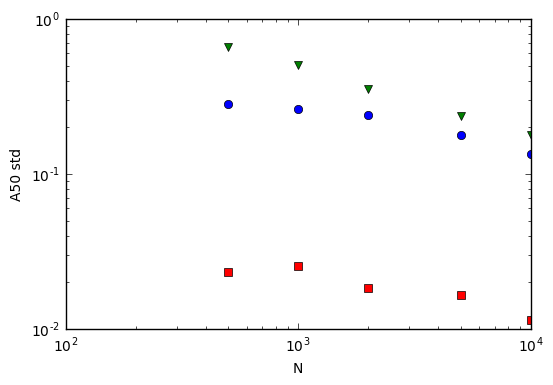

In [3]:
data1em3 = data[data['deltaT']==0.01]
plt.loglog(data1em3['N'],data1em3['A50std'], "o")
plt.loglog(data1em3['N'],data1em3['fitAmpStd'],"v")
plt.loglog(data1em3['N'],data1em3['fitAmpStdMean'],"s")
plt.ylabel("A50 std")
plt.xlabel("N")

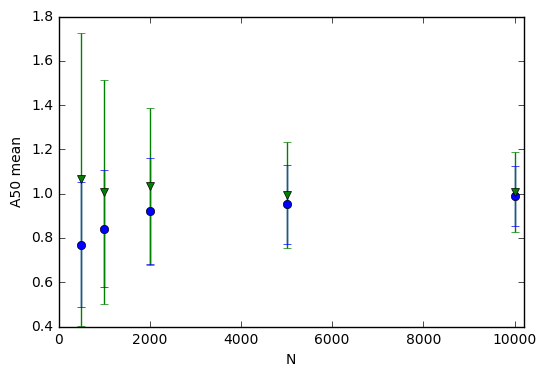

In [4]:
plt.errorbar(data1em3['N'],data1em3['A50mean'], yerr=data1em3['A50std'], fmt="o")
plt.errorbar(data1em3['N'],data1em3['fitAmpMean'], yerr=data1em3['fitAmpStd'], fmt="v")
plt.xlim((0,10200))
plt.ylabel("A50 mean")
plt.xlabel("N")

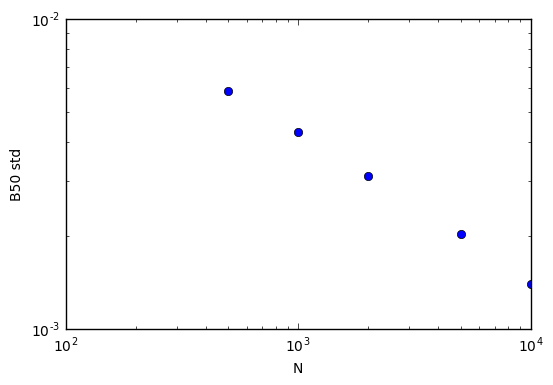

In [5]:
plt.loglog(data1em3['N'],data1em3['B50std'], "o")
plt.ylabel("B50 std")
plt.xlabel("N")

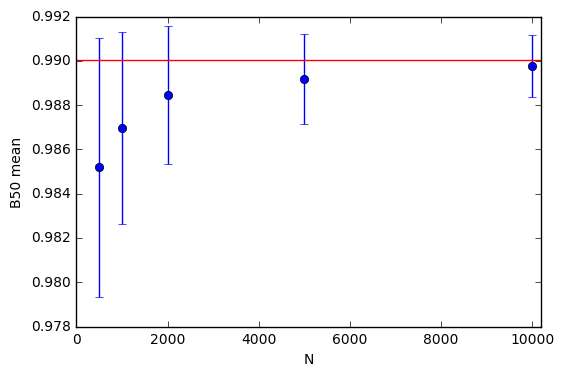

In [13]:
plt.errorbar(data1em3['N'],data1em3['B50mean'], yerr=data1em3['B50std'], fmt="o")
plt.xlim((0,10200))
plt.ylabel("B50 mean")
plt.xlabel("N")
plt.axhline(y=np.exp(-0.01),color="r")


In [7]:
data_multi = data.set_index(['deltaT','N']).sort_index()

In [71]:
data_multi

A50mean    A50std  AstdMean  fitAmpMean  fitAmpStd  \
deltaT N                                                              
0.01   200.0    1.273330  0.820522  3.079092    0.991210   0.857039   
       500.0    1.306166  0.675292  2.681947    1.027891   0.636475   
       1000.0   1.226970  0.561849  1.950625    1.025491   0.506729   
       2000.0   1.124885  0.377823  1.036267    0.991187   0.393966   
       5000.0   1.061671  0.220864  0.305691    0.995121   0.277234   
       10000.0  1.012949  0.140476  0.162224    0.977814   0.183878   
0.05   100.0    1.329876  0.685443  2.730507    1.050860   0.617760   
       200.0    1.267511  0.572643  2.030901    1.065551   0.499403   
       500.0    1.089346  0.322628  0.773483    1.008085   0.302399   
       1000.0   1.053697  0.217853  0.303861    1.020363   0.217769   
       2000.0   1.029952  0.148602  0.167018    1.014083   0.153104   
       5000.0   1.008349  0.092923  0.094564    1.001394   0.096551   
       10000.0  1.001507  0.061251  0.064718    0.997730   0.065187   
0.10   200.0    1.130864  0.371495  1.078487    1.006398   0.365321   
       500.0    1.045249  0.217373  0.300520    0.966724   0.285172   
       1000.0   1.013208  0.142782  0.162376    0.974980   0.177216   
       2000.0   1.011084  0.102418  0.106965    0.993369   0.124643   
       5000.0   1.002933  0.065454  0.064476    0.996267   0.088495   
       10000.0  1.003177  0.043824  0.045085    0.995702   0.075037   
0.20   100.0    1.140054  0.404204  1.140380    0.998840   0.354456   
       200.0    1.050489  0.249551  0.408703    0.987196   0.252185   
       500.0    1.020837  0.143181  0.166397    0.996570   0.156468   
       1000.0   1.006157  0.102921  0.107398    0.994269   0.110987   
       2000.0   1.003059  0.069991  0.073434    0.997725   0.075619   
       5000.0   1.003692  0.045168  0.045651    1.001472   0.049974   
       10000.0  1.000634  0.030523  0.031953    0.999303   0.034424   

                fitAmpStdMean   D50mean    D50std  DstdMean  fitDecayMean  \
deltaT N                                                                    
0.01   200.0        42.887082  0.991363  0.101231  0.100786      1.645193   
       500.0         0.022177  0.996642  0.064463  0.063673      1.233736   
       1000.0        4.605156  1.000296  0.045294  0.045095      1.204249   
       2000.0        5.928351  0.999653  0.031994  0.031832      1.305932   
       5000.0        0.020158  0.999933  0.019894  0.020108      1.217753   
       10000.0       0.014647  0.999583  0.014475  0.014194      1.108982   
0.05   100.0         0.040303  0.983303  0.140496  0.145748      1.016742   
       200.0         0.050848  0.997952  0.103932  0.103524      1.111056   
       500.0         0.909083  0.996960  0.064156  0.064994      1.008106   
       1000.0        0.617250  0.996287  0.045698  0.045768      1.022512   
       2000.0        0.013820  0.999555  0.032186  0.032404      1.012018   
       5000.0        0.252455  1.000103  0.021229  0.020475      1.008241   
       10000.0       0.179237  0.999255  0.013831  0.014450      1.002158   
0.10   200.0         1.331011  0.995251  0.102490  0.105373      1.210726   
       500.0         0.057400  0.997141  0.064090  0.066148      1.182890   
       1000.0        0.041771  0.997760  0.045820  0.046639      1.132522   
       2000.0        0.500572  0.998352  0.031760  0.032925      1.063345   
       5000.0        0.020103  0.999777  0.021472  0.020831      1.008020   
       10000.0       0.216211  0.999977  0.014926  0.014721      1.010613   
0.20   100.0         0.916885  0.977115  0.152791  0.157234      1.248924   
       200.0         0.596587  0.991265  0.104589  0.111066      1.112419   
       500.0         0.044704  0.995858  0.069942  0.069770      1.043979   
       1000.0        0.031284  0.999228  0.047236  0.049338      1.014103   
       2000.0        0.022229  0.998751  0.036103  0.034783      1.006245   
       5000.0        0.014

In [8]:
data_multi['A50std']

deltaT  N      
0.01    500.0      0.282547
        1000.0     0.262337
        2000.0     0.238604
        5000.0     0.178359
        10000.0    0.134049
0.05    500.0      0.217117
        1000.0     0.178234
        2000.0     0.136195
        5000.0     0.088213
        10000.0    0.063505
0.10    200.0      0.242475
        500.0      0.180187
        1000.0     0.134084
        2000.0     0.095847
        5000.0     0.060526
        10000.0    0.044866
0.20    200.0      0.190230
        500.0      0.131787
        1000.0     0.098182
        2000.0     0.068613
        5000.0     0.045384
        10000.0    0.031026
Name: A50std, dtype: float64

In [9]:
d = np.array(data['deltaT'])
N = np.array(np.log10(data['N']))
A = np.array(data['A50std'])

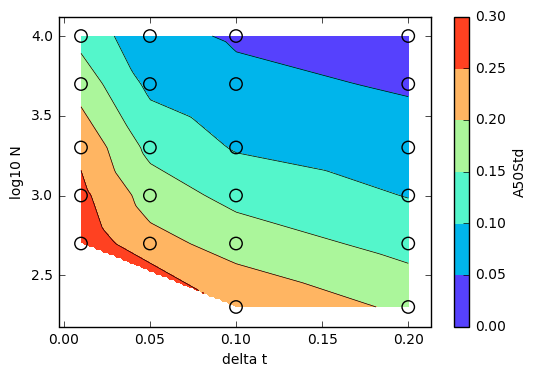

In [10]:
di,Ni = np.mgrid[min(d):max(d):100j,min(N):max(N):100j]
Ai = griddata((N,d),A,(Ni,di))

CS = plt.contour(di,Ni,Ai,5,linewidths=0.5,colors='k')
CS = plt.contourf(di,Ni,Ai,5,cmap=plt.cm.rainbow)
                  
cbar=plt.colorbar() # draw colorbar
cbar.set_label('A50Std')
plt.scatter(d,N,s=80,marker='o',facecolor="none",edgecolor='k')
plt.ylabel('log10 N')
plt.xlabel('delta t')


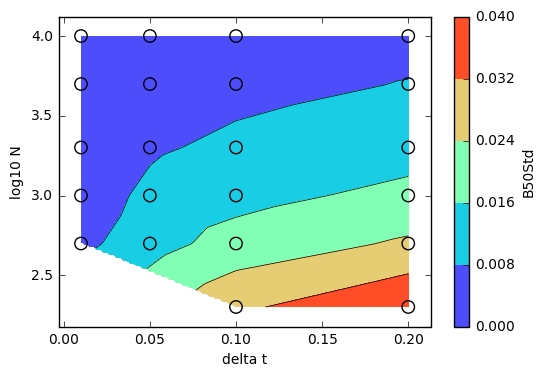

In [11]:
D = np.array(data['B50std'])
Di = griddata((N,d),D,(Ni,di))

CS = plt.contour(di,Ni,Di,5,linewidths=0.5,colors='k')
CS = plt.contourf(di,Ni,Di,5,cmap=plt.cm.rainbow)
                  
cbar=plt.colorbar() # draw colorbar
cbar.set_label('B50Std')
plt.scatter(d,N,s=80,marker='o',facecolor="none",edgecolor='k')
plt.ylabel('log10 N')
plt.xlabel('delta t')
